In [1]:
import pandas as pd

In [2]:
import requests
from geopy.geocoders import Nominatim

In [3]:
def getData(city):
  locator = Nominatim(user_agent="myGeocoder")
  location = locator.geocode(city)

  lat = location.latitude
  lon = location.longitude
  
  api_key = "7c3ee70966a7361a697fda3ca7a310ac"
  URL = f"http://api.openweathermap.org/data/2.5/air_pollution/forecast?lat={lat}&lon={lon}&appid={api_key}"

  response = requests.get(URL)
  data = ""
  
  if(response.status_code == 200):
    data = response.json()
  else:
    data="!D"
  
  return data

In [4]:
data = getData("rourkela")

In [5]:
df = pd.DataFrame(data["list"])
df.head()

,main,components,dt
0,{'aqi': 4},"{'co': 453.95, 'no': 0.03, 'no2': 6.94, 'o3': ...",1659776400
1,{'aqi': 4},"{'co': 460.63, 'no': 0.05, 'no2': 7.71, 'o3': ...",1659780000
2,{'aqi': 4},"{'co': 467.3, 'no': 0.06, 'no2': 7.97, 'o3': 1...",1659783600
3,{'aqi': 3},"{'co': 460.63, 'no': 0.04, 'no2': 8.31, 'o3': ...",1659787200
4,{'aqi': 3},"{'co': 460.63, 'no': 0.01, 'no2': 10.54, 'o3':...",1659790800


In [6]:
components = df["components"].apply(pd.Series)
type(components)

pandas.core.frame.DataFrame

In [7]:
components.head()

,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,453.95,0.03,6.94,24.68,2.59,26.01,27.81,1.92
1,460.63,0.05,7.71,21.10,2.80,27.47,29.17,2.06
2,467.30,0.06,7.97,18.60,2.44,27.01,28.64,2.31
3,460.63,0.04,8.31,16.63,1.73,24.30,25.89,2.34
4,460.63,0.01,10.54,13.05,2.27,21.61,23.41,2.31


In [8]:
main = df["main"].apply(pd.Series)
type(main)

pandas.core.frame.DataFrame

In [9]:
df.drop(["main", "components"], axis=1, inplace=True)

In [10]:
df.head()

,dt
0,1659776400
1,1659780000
2,1659783600
3,1659787200
4,1659790800


In [11]:
df = df.join(components).join(main)

In [12]:
df.rename(columns={"dt": "date"}, inplace=True)

In [13]:
df["date"] = pd.to_datetime(df["date"], unit="s")

In [14]:
df.set_index("date", inplace=True)

In [15]:
df

,co,no,no2,o3,so2,pm2_5,pm10,nh3,aqi
date,,,,,,,,,
2022-08-06 09:00:00,453.95,0.03,6.94,24.68,2.59,26.01,27.81,1.92,4
2022-08-06 10:00:00,460.63,0.05,7.71,21.10,2.80,27.47,29.17,2.06,4
2022-08-06 11:00:00,467.30,0.06,7.97,18.60,2.44,27.01,28.64,2.31,4
2022-08-06 12:00:00,460.63,0.04,8.31,16.63,1.73,24.30,25.89,2.34,3
2022-08-06 13:00:00,460.63,0.01,10.54,13.05,2.27,21.61,23.41,2.31,3
...,...,...,...,...,...,...,...,...,...
2022-08-10 20:00:00,230.31,0.00,3.47,30.04,3.55,5.37,5.62,0.71,1
2022-08-10 21:00:00,230.31,0.00,3.73,27.54,3.64,5.67,5.91,0.72,1
2022-08-10 22:00:00,233.65,0.00,4.46,24.68,3.93,6.34,6.58,0.76,1


# ```CO```

<AxesSubplot:xlabel='date'>

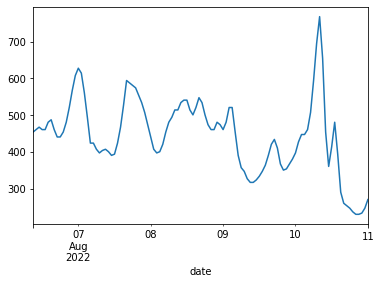

In [16]:
df["co"].plot()